# Blog Update: Past 6 months

Hi everyone! It has been a while since I posted on my website. A lot has happened in the meantime, some good and bad outcomes. 
Some unfortunate events included the pandemic during March, which was the last time I posted as COVID-19 began to worsen around the world. This pandemic has definitely made 2020 a crazy year and I hope everyone's families are staying safe and able to be supported financially during this time. My family has been safe thank goodness. 

Some good news included my new position at AdventHealth as a data analyst for the West Florida Market. It has been interesting to see how a healthcare company is pivot(tables hehe)ing during all this. To say our company hasn't been affected would be a lie. Working for AdventHealth for 6 months, I have developed new skills and made some great friends! So overall things have been going well for me. 

My parents have almost finished building their new home, hopefully it will be done by December of this year. They have without a doubt had some ups and downs during this process. Their original contractor went bankrupt due to Covid, but their new one is fantastic! I'm sure they will be glad to have a place they can call home again.

This month my girlfriend and I will be moving into a townhouse from an apartment. We are extremely glad to be upgrading our living space. Also in August, we adopted two(too hehe) cute juveniles leopard gecko. They are named Mango and Nugget. Below is a cute little pic of Mango. Thanks for reading my update. I hope you enjoy my project down below!

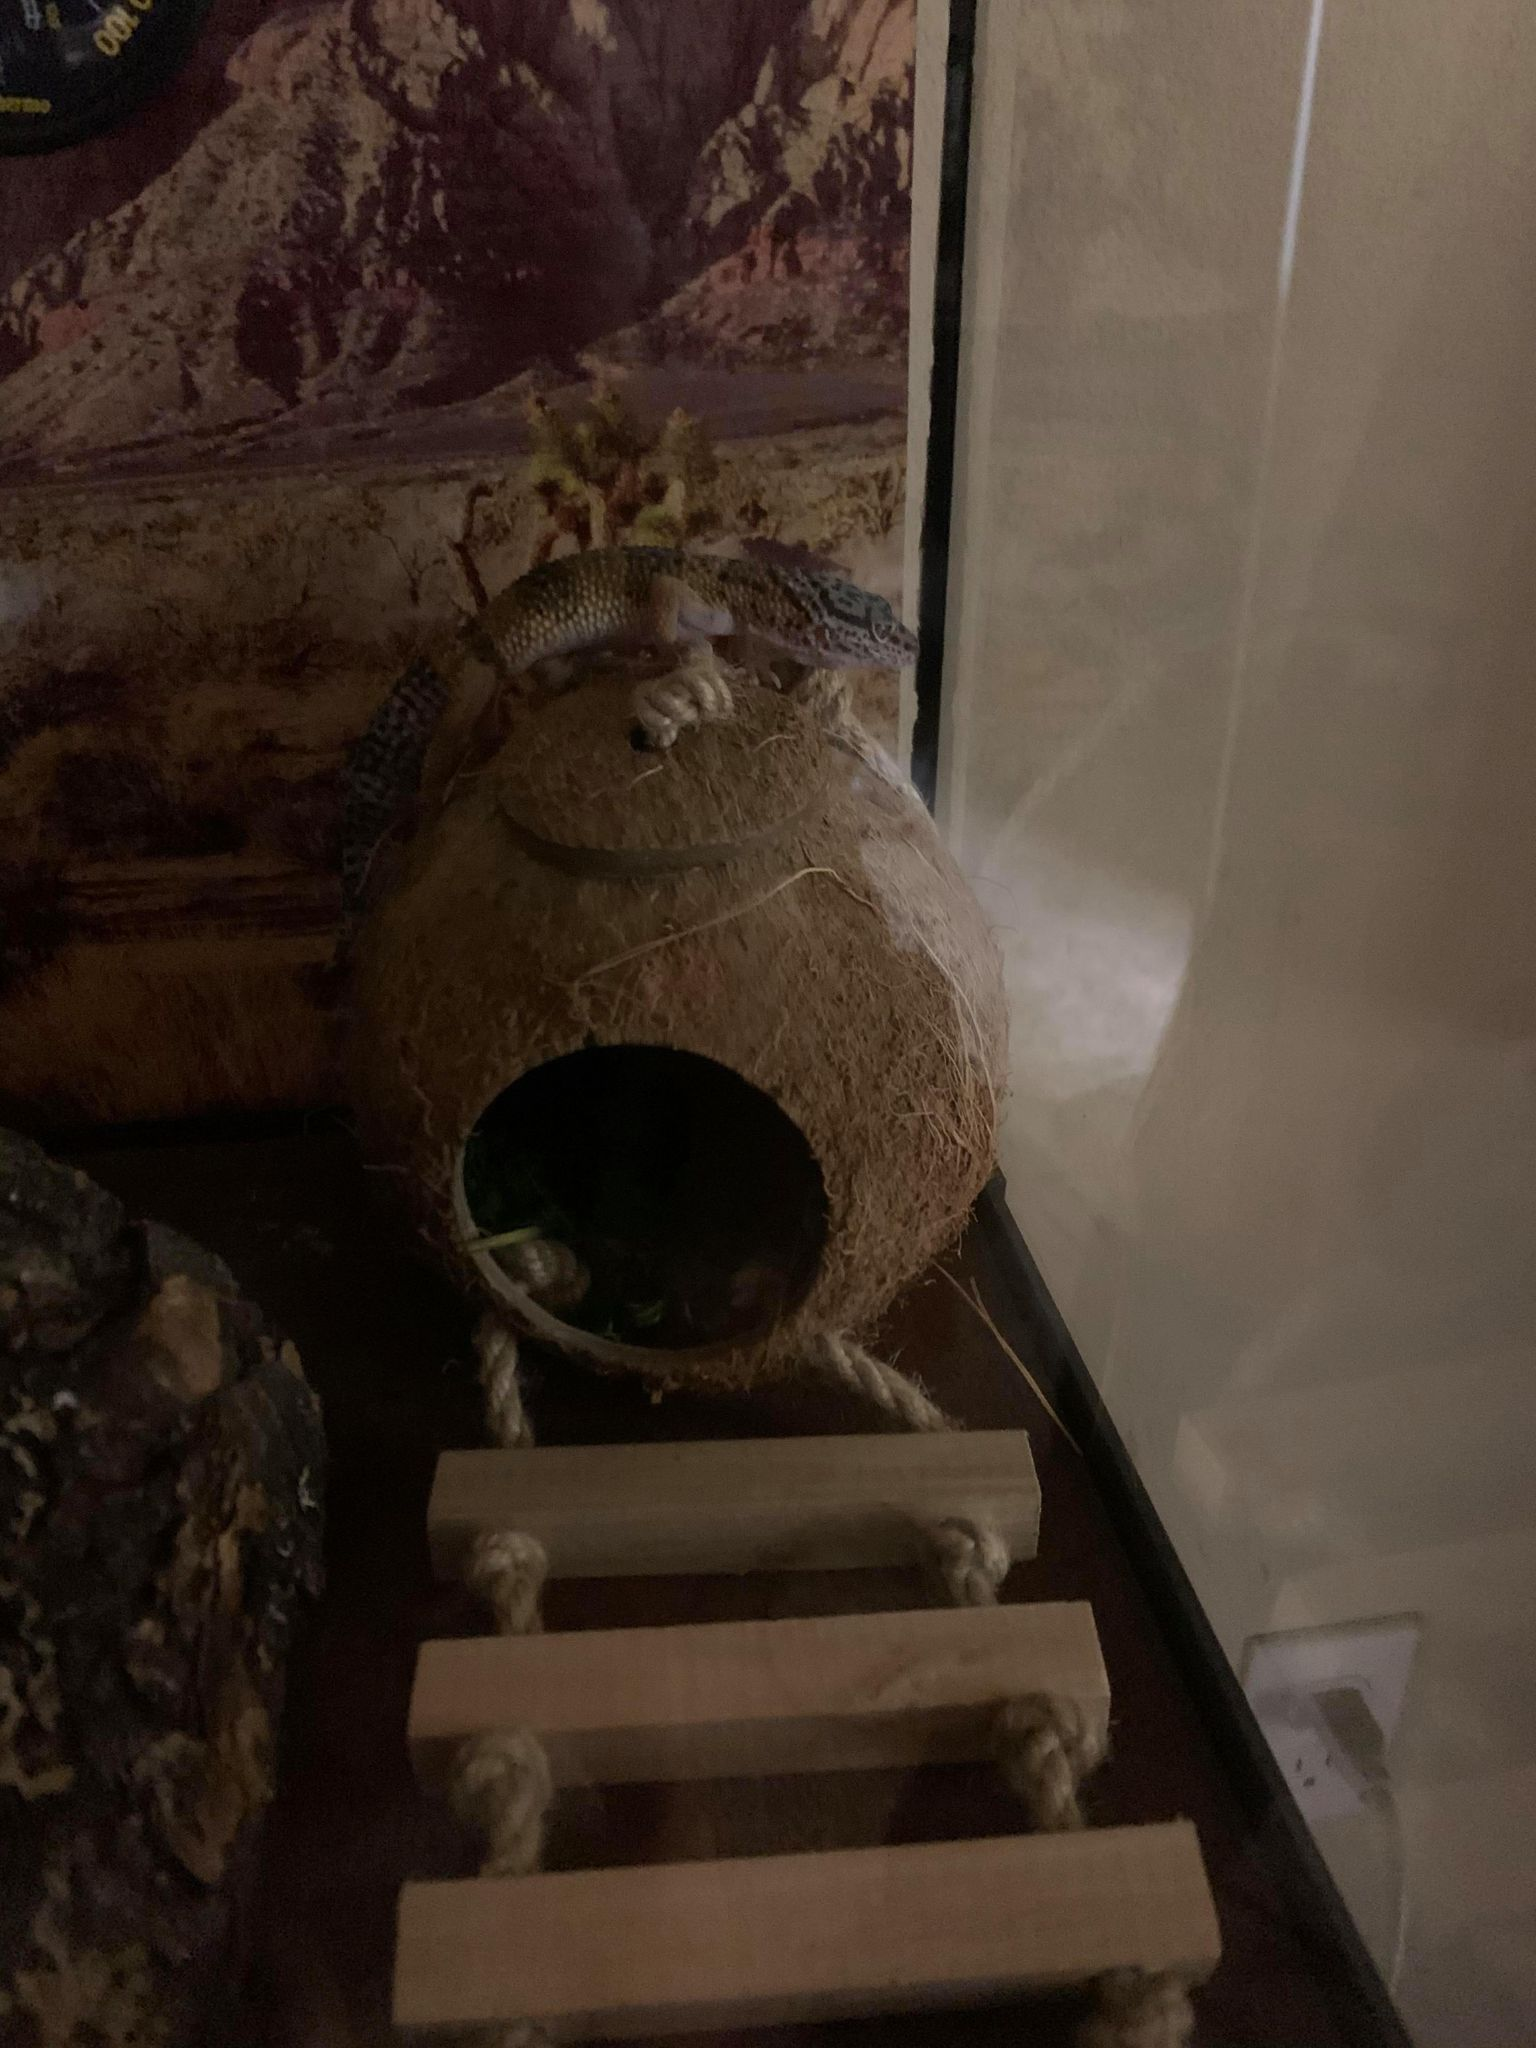


# Using pivot tables in python on a unique data set

This project aims to show how Python can be used to replace Excel. For instance, your data set has over a million rows and Excel's capabilities are limited to load that data set. Many Excel users are familiar with pivot tables, so this project aims to bridge the gap between the two programs.

This contains a dataset released by ProPublica Data Store on civilian complaints against New York City police officers. I thought this was an interesting data set to analyze because it was contested in court to be released. Just for the record, this data set is not for any political agenda and will be viewed and analzyed objectively. 
 
https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers?fbclid=IwAR2_BoC1Yn0cI3jvwnVz2kruYX_P8unvcOXYXG1bgsldSZ2nwAmUcNHMNJo


## Import Libraries
The first step will be importing various libraries that will be used for this project

In [1]:
import pandas as pd
import numpy as np
import datetime
from operator import attrgetter
import matplotlib.pyplot as plt

## Load in the data
Load in the data from an .xlsx format where pandas will be used with the .read_excel extension. Use .head() to get a quick view of the data.

In [2]:
dfs = pd.read_excel('C:/Users/blong/Desktop/Python/allegations/allegations.xlsx', sheet_name='allegations')

dfs.head()

,unique_mos_id,first_name,last_name,command_now,complaint_id,month_received,year_received,month_closed,year_closed,command_at_incident,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,42835,7,2019,5,2020,078 PCT,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,24601,11,2011,8,2012,PBBS,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,26146,7,2012,9,2013,PBBS,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,40253,8,2018,2,2019,078 PCT,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


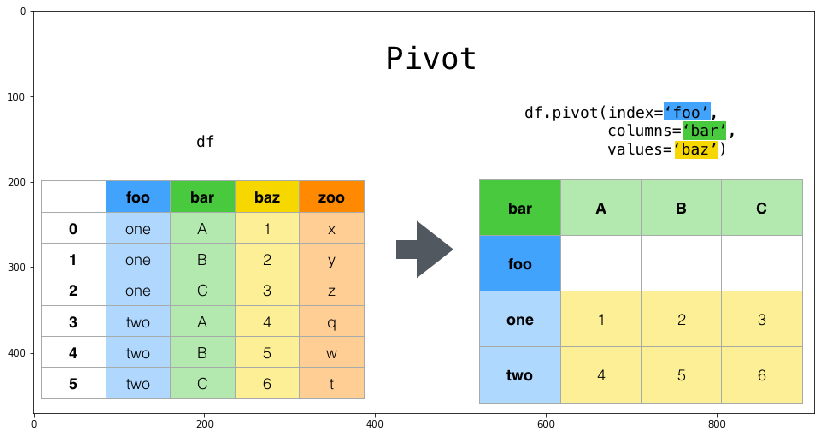

In [3]:
#how to load an url image in python
from PIL import Image 
import requests
response = requests.get('https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png', stream=True)
img = Image.open(response.raw)
plt.figure(figsize = (14,12))
plt.imshow(img)
plt.show()

### Pivot table 1: Number of months per allegation

First thing is to check the data type of month and year received category.

In [4]:
type(dfs.month_received)

pandas.core.series.Series

Since it is a Series, convert both month and year to string, and then concatenate the strings together to get a date. After that, convert the string to a date time format. With a bit of work, we can properly subtract the received and closed values.    

In [5]:
#convert to strings
dfs['month_received'] = dfs['month_received'].apply(str)
dfs['year_received'] = dfs['year_received'].apply(str)
#append together with a /
dfs['date_received'] = dfs.month_received +"/"+ dfs.year_received

#Convert to date time format
dfs.date_received = pd.to_datetime(dfs.date_received).dt.to_period('M')
dfs['date_received']

0        2019-07
1        2011-11
2        2011-11
3        2012-07
4        2018-08
          ...   
33353    2016-08
33354    2016-08
33355    2016-08
33356    2016-08
33357    2016-08
Name: date_received, Length: 33358, dtype: period[M]

The same process of above has to be done for the closed date so the date can be subtracted. 

In [6]:
dfs['month_closed'] = dfs['month_closed'].apply(str)
dfs['year_closed'] = dfs['year_closed'].apply(str)
dfs['date_closed'] = dfs.month_closed +"/"+ dfs.year_closed

dfs.date_closed = pd.to_datetime(dfs.date_closed).dt.to_period('M')
dfs['date_closed']

0        2020-05
1        2012-08
2        2012-08
3        2013-09
4        2019-02
          ...   
33353    2017-02
33354    2017-02
33355    2017-02
33356    2017-02
33357    2017-02
Name: date_closed, Length: 33358, dtype: period[M]

Now that the dates have been converted, lets subtract closed from received to find the time between when investigations opened and closed.

In [7]:
dfs['difference_in_months'] = dfs['date_closed']-dfs['date_received']
dfs['difference_in_months']

0        <10 * MonthEnds>
1         <9 * MonthEnds>
2         <9 * MonthEnds>
3        <14 * MonthEnds>
4         <6 * MonthEnds>
               ...       
33353     <6 * MonthEnds>
33354     <6 * MonthEnds>
33355     <6 * MonthEnds>
33356     <6 * MonthEnds>
33357     <6 * MonthEnds>
Name: difference_in_months, Length: 33358, dtype: object

Uh-oh we don't want that MonthsEnds text in our new column lets use the attrgetter to pull out the integer in this python object.

In [8]:
dfs['difference_in_months'] = dfs['difference_in_months'].apply(attrgetter('n'))
dfs['difference_in_months']

0        10
1         9
2         9
3        14
4         6
         ..
33353     6
33354     6
33355     6
33356     6
33357     6
Name: difference_in_months, Length: 33358, dtype: int64

That's better! Now a pivot table can be built using the new difference_in_months column. The index is rows in pivot tables and values are the same. The aggregate functions being calculated are median, mean, max and min.

In [9]:
pivot_alleg = dfs.pivot_table(index=['allegation'], values=['difference_in_months'], aggfunc={'median','mean','min','max'})
pivot_alleg

difference_in_months                       
                                  max       mean median  min
allegation                                                  
Action                           18.0   8.787975    9.0  1.0
Animal                           11.0   7.666667    6.0  6.0
Arrest/D. A. T.                   0.0   0.000000    0.0  0.0
Arrest/Onlooker                   0.0   0.000000    0.0  0.0
Beat                              0.0   0.000000    0.0  0.0
...                               ...        ...    ...  ...
Vehicle Searched                  7.0   0.318182    0.0  0.0
Vehicle search                   25.0  10.024199   10.0  2.0
Vehicle stop                     25.0   9.484461    9.0  1.0
White                             0.0   0.000000    0.0  0.0
Word                             37.0  10.026383   10.0  1.0

[114 rows x 4 columns]

However that is not sorted the way we want so reindexing python by the average values will give the correct results.

In [10]:
top_allegations = pivot_alleg.reindex(pivot_alleg['difference_in_months'].sort_values(by='mean', ascending=False).index)
top_allegations

difference_in_months                       
                                      max       mean median  min
allegation                                                      
Gun fired                            75.0  22.075000   17.0  0.0
Police shield                        35.0  14.818182   13.0  7.0
Flashlight as club                   20.0  12.555556   12.5  3.0
Gun as club                          27.0  12.357143   12.0  4.0
Body Cavity Searches                 15.0  12.333333   15.0  7.0
...                                   ...        ...    ...  ...
Radio As Club                         0.0   0.000000    0.0  0.0
Profane Gesture                       0.0   0.000000    0.0  0.0
Gay/Lesbian Slur                      0.0   0.000000    0.0  0.0
Property Damaged                      0.0   0.000000    0.0  0.0
Mace                                  0.0   0.000000    0.0  0.0

[114 rows x 4 columns]

Now a pivot table top allegations sorted by average number of months it took for an allegation case to be resolved. As above some of the top allegations are Gun fired, Police shield, Flashlight as club, etc. The ones associated with violence had the longest resolution time.

### Pivot table 2: Percentage of totals for allegations
Now lets build a pivot table sorted by the top percentage of totals for each allegation.

In [11]:
#pivot tables can also have user created functions here is one to calculate the percentage total
func = lambda x: 100*x.count()/dfs.shape[0]
pivot_count = dfs.pivot_table(index=['allegation'], values=['unique_mos_id'], aggfunc=func)
#sort by highest percentage
pivot_count = pivot_count.reindex(pivot_count['unique_mos_id'].sort_values(ascending=False).index)
pivot_count

,unique_mos_id
allegation,
Physical force,14.536243
Word,11.817255
Stop,6.894898
Search (of person),6.136459
Frisk,5.773727
...,...
"Sex Miscon (Sexual Harassment, Gesture)",0.005996
Other Asian,0.002998
Oriental,0.002998


Physical force, Word, Stop and Search are the most common allegations making nearly 40% of all allegations.

### Pivot table 3: Allegations by Ethnicity with a plot

Using matlibplot pivot tables can also be ploted to visually see the results

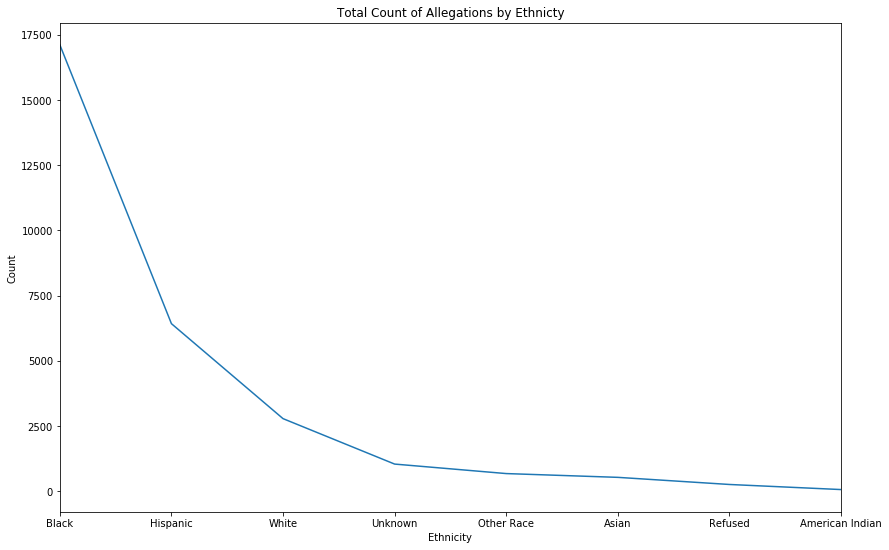

In [12]:

pivot_officer_plot = dfs.pivot_table(index=['complainant_ethnicity'], values=['unique_mos_id'], aggfunc='count')
pivot_officer_plot = pivot_officer_plot.reindex(pivot_officer_plot['unique_mos_id'].sort_values( ascending=False).index).plot(figsize = (14,9),legend=None)

plt.xlabel('Ethnicity')
plt.ylabel('Count') 
plt.title('Total Count of Allegations by Ethnicty')

plt.show()

The top 3 ethnicities that have allegations are Black, Hispanic, and White. A normal pivot table as well to see the results.

In [13]:
pivot_officer = dfs.pivot_table(index=['complainant_ethnicity'], values=['unique_mos_id'], aggfunc='count')
pivot_officer = pivot_officer.reindex(pivot_officer['unique_mos_id'].sort_values( ascending=False).index)
pivot_officer

,unique_mos_id
complainant_ethnicity,
Black,17114
Hispanic,6424
White,2783
Unknown,1041
Other Race,677
Asian,532
Refused,259
American Indian,64


### Pivot table 4: Allegations by officer
Pivot tables can also have multiple rows be placed that way data can be grouped into different categories. For python those different rows go in the index.

In [14]:
#create a new column that displays the full name of the officer
dfs['full_name'] = dfs.first_name +" "+ dfs.last_name

In [15]:
pivot_name = dfs.pivot_table(index=['full_name','allegation'], values=['unique_mos_id'], aggfunc='count')
pivot_name

unique_mos_id
full_name         allegation                                          
Aaron Edwards     Question                                           1
                  Refusal to provide name/shield number              1
                  Stop                                               1
                  Strip-searched                                     1
Aaron Klein       Frisk                                              1
...                                                                ...
Zoilo Encarnacion Vehicle stop                                       3
                  Word                                               3
Zul Chowdhury     Pepper spray                                       1
                  Physical force                                     2
                  Stop                                               1

[22885 rows x 1 columns]

This pivot table now shows the different offices and what allegations they commited.

### Pivot table 5: Looking at officer ethnicity, age, and rank
The final pivot table will look at the various categorical data of the offices that is provided.

In [16]:
#use fill_value=0 to fill out NAs with 0
pivot_rank = dfs.pivot_table(index=['mos_ethnicity','mos_age_incident'], columns=['rank_incident'],
                             values=['unique_mos_id'], aggfunc='count' ,fill_value=0)
pivot_rank

unique_mos_id                         \
rank_incident                          Captain Chiefs and other ranks   
mos_ethnicity   mos_age_incident                                        
American Indian 27                           0                      0   
                28                           0                      0   
                29                           0                      0   
                30                           0                      0   
                31                           0                      0   
...                                        ...                    ...   
White           54                           0                      0   
                55                           0                      0   
                56                           1                      0   
                57                           0                      0   
                58                           0                      0   

                                                                       \
rank_incident                    Deputy Inspector Detective Inspector   
mos_ethnicity   mos_age_incident                                        
American Indian 27                              0         0         0   
                28                              0         0         0   
                29                              0         0         0   
                30                              0         0         0   
                31                              0         6         0   
...                                           ...       ...       ...   
White           54                              0         1         0   
                55                              0         0         0   
                56                              0         1         0   
                57                              0         4         0   
                58                              0         2         0   

                                                                     
rank_incident                    Lieutenant Police Officer Sergeant  
mos_ethnicity   mos_age_incident                                     
American Indian 27                        0              3        0  
                28                        0             11        0  
                29                        0              2        0  
                30                        0              1        0  
                31                        0              1        0  
...                                     ...            ...      ...  
White           54                        0              0       13  
                55                        0              0        2  
                56                        0              1        2  
                57                        0              0        0  
                58                        0              0        1  

[152 rows x 8 columns]

## Conclusion

This project's goal was mainly to look at how to use python to replace Excel. While this may have been easier to use in Excel, its abilities are limited especially when it comes to larger files or automating many functions. Thanks for reading through my blog and project!